Task 3

In [1]:
#Packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten, GlobalAveragePooling2D, InputLayer, Activation
from keras.optimizers import Adam, RMSprop
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
 

Using TensorFlow backend.


In part 1, I've start by loading all the image data into a list, I then go on to use sift to calculate the descriptors and the key points. These are then put into lists. <br> 

In [2]:
#part 1
img = ['course/Bakewell-Tart.png','course/Branflakes-big.png','course/Branflakes.png','course/Cheerios-small.png','course/Cheerios-top.png','course/Cheerios.png','course/Nestle.png','course/Orgainc.png','course/PG-Tips.png','course/Pizza.png','course/Quorn-big.png','course/Quorn.png','course/Sainsburys.png','course/Shredded-Wheat-small.png','course/Shredded-Wheat.png','course/Tescos-Kitchen-Foil.png']
images = []
for i in range(len(img)):
    images.append(cv2.imread(img[i]))

sift = cv2.xfeatures2d.SURF_create()
Kps = []
Ims = []
Des = []
for i in range(len(images)): # over all the images
    
    image = images[i]
    
    # calculate SIFT features on gray-scale version of it
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kp, desc = sift.detectAndCompute(gray, None)
    
    assert len(kp)>0
    
    Ims.append(gray)
    Kps.append(kp)
    Des.append(desc)

To solve this poroblem I've go through the following steps: <br>
1. Open the video and set up the flann based mature and sift method.
2. For each frame calculate the sift description and key points.
3. Try to match each of the test images to a frame in the video and count the number of good matches.
4. Have a minimum number of good matches to produce an image showing the matches and the points that have been matched. <br>


This was my initial code which matches only one of the images in the video, to solve this I implement these next steps:


5. If there is another image that has good matches with the video it moves on to the next steps. In my code it requires 50 good matches todo so.
6. Takes the co-ordinates of the points of the frame that where matched removes the most extreme 20 points and applies a blank overlay over that area.
7. Runs steps 2 and 3 on the new image to try and match a second image is present. It requires more matches to identify the other image.
8. If the image identified in the new image is the same as the one identified in the orginal frame the image from step 4 is shown.
9. If the two images are different a new image is produced showing the matches between the two test images and the frame


The code also contains comented lines that can be uncommented if you wish to see the matches between all the images and a frame

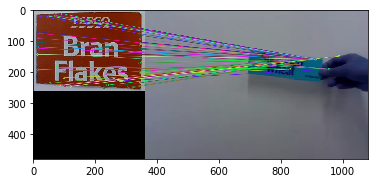

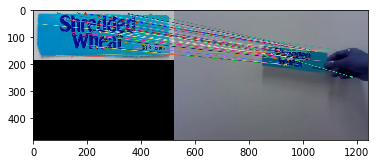

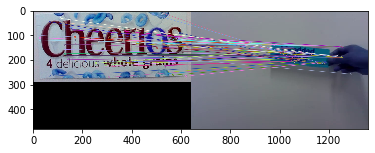

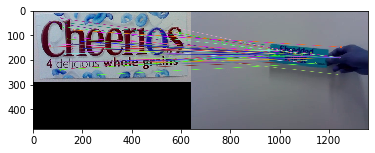

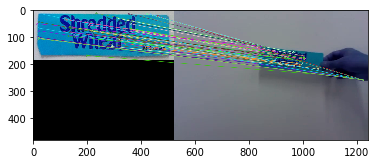

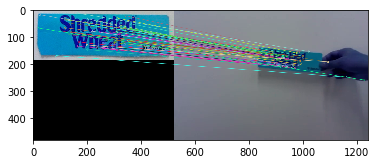

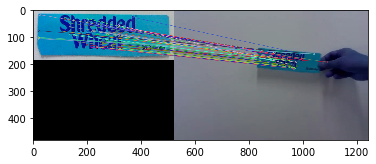

KeyboardInterrupt: 

In [3]:
#part 2
#Step 1
cap = cv2.VideoCapture('objects-test-1.m4v')

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=10)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params) # make FLANN searcher
sift = cv2.xfeatures2d.SURF_create()

counter=0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    counter+=1
    if ret == True:
        if counter > 0:#To skip to bits of the video or to look at every n frames by using counter%n == 0, frame 3500 for 2 images
           #Step 2
            img2 = frame 
            gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
            kp2, des2 = sift.detectAndCompute(gray, None)

            try:
                if des2 == None:
                    continue
            except:  
                #Step 3
                gm=[]
                good = []
                GOOD = []
                for i in range(len(images)):
                    try:
                        matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                        ratio_thresh = 0.7
                        good_matches = []
                        for m,n in matches:
                            if m.distance < ratio_thresh * n.distance:
                                good_matches.append(m)
                                GOOD.append([m,n])
                        gm.append(len(good_matches))
                        good.append(good_matches)
                    except:
                        continue
                if gm == []: #If no good matches are found the program moves to the next frame
                    continue
                #Step 4
                elif max(gm) > 30: #This is the mininmum number of good matches that are needed to produce a match 
                    try: #This matches the best image with the frame and produces a image showing the matches 
                        D=0
                        k=0
                        while k != max(gm):
                            D+=1
                            k=gm[D]
#If you want to see matches for all the images
                        #for i in range(len(images)):
                         #   img1 = images[i]
                          #  kp1 =Kps[i]
                           # img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
                            #img3 = cv2.drawMatches(img1, kp1, img2, kp2, good[D], img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                        
                        img1 = images[D]
                        kp1 =Kps[D]
                        img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
                        img3 = cv2.drawMatches(img1, kp1, img2, kp2, good[D], img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                    except:
                        continue
                #Step 5
                if sorted(gm,reverse=True)[1] > 50: #needs a very strong match to concider looking for another image
                    #Step 6
                    #finds the co-ordinates of the key points that have been matched
                    list_kp2 = []
                    for mat in GOOD:
                        # Get the matching keypoints for each of the images
                        img2_idx = mat[1].trainIdx

                        (x2,y2) = kp2[img2_idx].pt

                        list_kp2.append((x2, y2))
                    #removes the most extreme 20 
                    list_kp2 = sorted(list_kp2)[10:-10]
                    #calculates the region that was identified 
                    X = []
                    Y = []
                    for i in range(len(list_kp2)):
                        X.append(list_kp2[i][0])
                        Y.append(list_kp2[i][1])

                    s_img = np.empty((int(max(Y)-min(Y)),int(max(X)-min(X))))
                    dd = int(min(X))
                    de = int(min(Y))
                    gray[de:de+s_img.shape[0],dd:dd+s_img.shape[1]] = s_img
                    #Step 7
                    kp2, des2 = sift.detectAndCompute(gray, None)

                    try:
                        if des2 == None:
                            continue
                    except:     
                        gm=[]
                        good = []
                        for i in range(len(images)):
                            try:
                                matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                                ratio_thresh = 0.7
                                good_matches = []
                                for m,n in matches:
                                    if m.distance < ratio_thresh * n.distance:
                                        good_matches.append(m)
                                gm.append(len(good_matches))
                                good.append(good_matches)
                            except:
                                continue
                        if max(gm) > 40: 
                            try:
                                d=0
                                k=0
                                while k != max(gm):
                                    d += 1
                                    k = gm[d]
                                #Step 8
                                if d == D: #stops the same picture being identified twice
                                    plt.imshow(img3)
                                    plt.show()
                                else:
                                    #Step 9
                                    img1 = images[d]
                                    kp1 = Kps[d]
                                    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
                                    img5 = cv2.drawMatches(img1, kp1, img2, kp2, good[d], img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                                    con = np.concatenate((img3, img5), axis=1)
                                    plt.imshow(con)
                                    plt.show()
                            except:
                                continue
                        else:
                            plt.imshow(img3)
                            plt.show()
                else:
                    plt.imshow(img3)
                    plt.show()
    else:
        break
cap.release()
cv2.destroyAllWindows()

In this part the same code as part two but tested on the second video

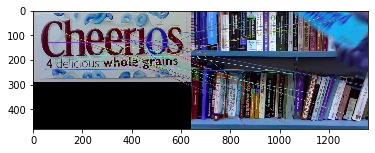

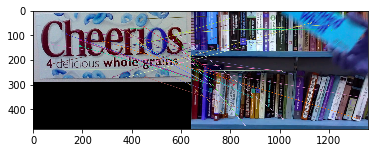

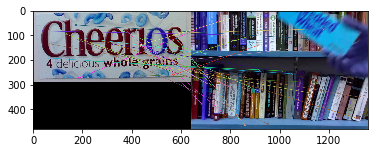

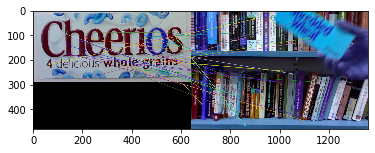

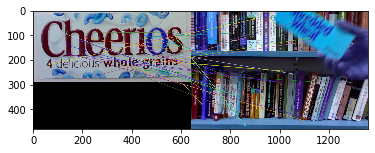

KeyboardInterrupt: 

In [4]:
#part 3
cap = cv2.VideoCapture('objects-test-2.m4v')

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=10)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params) # make FLANN searcher
sift = cv2.xfeatures2d.SURF_create()

counter=0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    counter+=1
    if ret == True:
        if counter > 0:#To skip to bits of the video or to look at every n frames by using counter%n == 0, frame 3500 for 2 images
            img2 = frame 
            gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
            kp2, des2 = sift.detectAndCompute(gray, None)

            try:
                if des2 == None:
                    continue
            except:     
                gm=[]
                good = []
                GOOD = []
                for i in range(len(images)):
                    try:
                        matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                        ratio_thresh = 0.7
                        good_matches = []
                        for m,n in matches:
                            if m.distance < ratio_thresh * n.distance:
                                good_matches.append(m)
                                GOOD.append([m,n])
                        gm.append(len(good_matches))
                        good.append(good_matches)
                    except:
                        continue
                if gm == []: #If no good matches are found the program moves to the next frame
                    continue
                elif max(gm) > 30: #This is the mininmum number of good matches that are needed to produce a match 
                    try: #This matches the best image with the frame and produces a image showing the matches 
                        D=0
                        k=0
                        while k != max(gm):
                            D+=1
                            k=gm[D]

                        img1 = images[D]
                        kp1 =Kps[D]
                        img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
                        img3 = cv2.drawMatches(img1, kp1, img2, kp2, good[D], img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                    except:
                        continue
                if sorted(gm,reverse=True)[1] > 50: #needs a very strong match to concider looking for another image
                    list_kp2 = []
                    for mat in GOOD:
                        # Get the matching keypoints for each of the images
                        img2_idx = mat[1].trainIdx

                        (x2,y2) = kp2[img2_idx].pt

                        list_kp2.append((x2, y2))
                    list_kp2 = sorted(list_kp2)[10:-10]

                    X = []
                    Y = []
                    for i in range(len(list_kp2)):
                        X.append(list_kp2[i][0])
                        Y.append(list_kp2[i][1])

                    s_img = np.empty((int(max(Y)-min(Y)),int(max(X)-min(X))))
                    dd = int(min(X))
                    de = int(min(Y))
                    gray[de:de+s_img.shape[0],dd:dd+s_img.shape[1]] = s_img

                    kp2, des2 = sift.detectAndCompute(gray, None)

                    try:
                        if des2 == None:
                            continue
                    except:     
                        gm=[]
                        good = []
                        for i in range(len(images)):
                            try:
                                matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                                ratio_thresh = 0.7
                                good_matches = []
                                for m,n in matches:
                                    if m.distance < ratio_thresh * n.distance:
                                        good_matches.append(m)
                                gm.append(len(good_matches))
                                good.append(good_matches)
                            except:
                                continue
                        if max(gm) > 40:
                            try:
                                d=0
                                k=0
                                while k != max(gm):
                                    d += 1
                                    k = gm[d]
                                if d == D: #stops the same picture being identified twice
                                    plt.imshow(img3)
                                    plt.show()
                                else:
                                    img1 = images[d]
                                    kp1 = Kps[d]
                                    img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
                                    img5 = cv2.drawMatches(img1, kp1, img2, kp2, good[d], img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
                                    con = np.concatenate((img3, img5), axis=1)
                                    plt.imshow(con)
                                    plt.show()
                            except:
                                continue
                        else:
                            plt.imshow(img3)
                            plt.show()
                else:
                    plt.imshow(img3)
                    plt.show()
    else:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
"""
#to make the video for part 4
A phone was used in the end to make this video

import numpy as np
import cv2

cap = cv2.VideoCapture(0)#'video-part4.m4v')

out = cv2.VideoWriter('video-part4.m4v', -1, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0)

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()
"""

The same preprocessing as in part one, but done on my testimg images.

In [2]:
#preprocessing for part 4
img = ['course/swif.jpg','course/cran.jpg','course/film.jpg','course/mono.jpg','course/tab.jpg','course/santa.jpg']
images = []
for i in range(len(img)):
    image = cv2.imread(img[i])
    width = np.shape(image)[0] * (3/10)
    hight = np.shape(image)[1] * (3/10)
    image = cv2.resize(image, (int(hight),int(width)), interpolation = cv2.INTER_AREA)
    images.append(np.array(image))
    

sift = cv2.xfeatures2d.SURF_create()
Kps = []
Ims = []
Des = []
for i in range(len(images)): # over all the images
    
    image = images[i]
    
    #calculate SIFT features on gray-scale version of it
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kp, desc = sift.detectAndCompute(gray, None)
    
    assert len(kp)>0
    
    Ims.append(gray)
    Kps.append(kp)
    Des.append(desc)

Very similar code to part two but instead of producing images showing matching features, it finds the best matched image and adds the number of the image to a list of predictions as well as the frame number that the image was identified in. 

In [6]:
#part 4

cap = cv2.VideoCapture('part4.1.mp4')


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=10)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params) # make FLANN searcher
sift = cv2.xfeatures2d.SURF_create()


predictions = []
counter=0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    counter+=1
    if ret == True:
    #To skip to bits of the video or to look at every n frames by using counter%n == 0, frame 3500 for 2 images
        if counter > 0:
            img2 = frame 
            gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
            kp2, des2 = sift.detectAndCompute(gray, None)

            try:
                if des2 == None:
                    continue
            except:     
                gm=[]
                good = []
                GOOD = []
                for i in range(len(images)):
                    try:
                        matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                        ratio_thresh = 0.7
                        good_matches = []
                        for m,n in matches:
                            if m.distance < ratio_thresh * n.distance:
                                good_matches.append(m)
                                GOOD.append([m,n])
                        gm.append(len(good_matches))
                        good.append(good_matches)
                    except:
                        continue
                if gm == []: #If no good matches are found the program moves to the next frame
                    continue
                elif max(gm) > 50: #This is the mininmum number of good matches that are needed to produce a match 
                    try: #This matches the best image with the frame and produces a image showing the matches 
                        D=0
                        k=0
                        while k != max(gm):
                            D+=1
                            k=gm[D]
                    except:
                        continue
                if sorted(gm,reverse=True)[1] > 50: #needs a very strong match to concider looking for another image
                    list_kp2 = []
                    for mat in GOOD:
                        # Get the matching keypoints for each of the images
                        img2_idx = mat[1].trainIdx

                        (x2,y2) = kp2[img2_idx].pt

                        list_kp2.append((x2, y2))
                    list_kp2 = sorted(list_kp2)[10:-10]

                    X = []
                    Y = []
                    for i in range(len(list_kp2)):
                        X.append(list_kp2[i][0])
                        Y.append(list_kp2[i][1])

                    s_img = np.empty((int(max(Y)-min(Y)),int(max(X)-min(X))))
                    dd = int(min(X))
                    de = int(min(Y))
                    gray[de:de+s_img.shape[0],dd:dd+s_img.shape[1]] = s_img

                    kp2, des2 = sift.detectAndCompute(gray, None)

                    try:
                        if des2 == None:
                            continue
                    except:     
                        gm=[]
                        good = []
                        for i in range(len(images)):
                            try:
                                matches = flann.knnMatch(Des[i],des2,k=2) # find matches!
                                ratio_thresh = 0.7
                                good_matches = []
                                for m,n in matches:
                                    if m.distance < ratio_thresh * n.distance:
                                        good_matches.append(m)
                                gm.append(len(good_matches))
                                good.append(good_matches)
                            except:
                                continue
                        if max(gm) > 40: 
                            try:
                                d=0
                                k=0
                                while k != max(gm):
                                    d += 1
                                    k = gm[d]
                                if d == D: #stops the same picture being identified twice
                                    predictions.append([counter,[D]])
                                else:
                                    predictions.append([counter,[D,d]])
                            except:
                                continue
                        else:
                            predictions.append([counter,[D]])
                else:
                    predictions.append([counter,[D]])
    else:
        break 
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

This makes the confusion matrix, I have made a list of the image number that appears in each of the frames. For each of the frames my program identifies a match in, the actual image number is found and the image that has been identified number is added to that specific column in the row of the actual image.

The image number is determained by its position in the list of preprocessed images.
<br>
The numbers in this matrix may be different to my report as the code has been ran again since, and different matches have been found.

In [7]:
#confusion matrix for part 4
classes = 6
num_classes = np.max(np.array(classes))
print('num classes is ', num_classes)

confusion = np.zeros((num_classes, num_classes))

actual = [[5]]*289 + [[2]]*177 + [[2,4]]*472 + [[1]]*447
 

for i in range(len(predictions)):
    j = predictions[i][0]
    ac = actual[j]
    if len(ac) == 1:
        pred = predictions[i][1][0]
        confusion[ac[0]][pred] += 1 
        try:
            pred = predictions[i][1][1]
            confusion[ac[0]][pred] += 1 
        except:
            continue
    elif len(ac) == 2:
        pred = predictions[i][1]
        if len(pred) == 1:
            if pred[0] == ac[0]:
                confusion[ac[0]][pred[0]] += 1 
            elif pred[0] == ac[1]:
                confusion[ac[1]][pred[0]] += 1 
            else:
                confusion[ac[0]][pred[0]] += 1
        if len(pred) == 2:
            if pred[0] == ac[0]:
                confusion[ac[0]][pred[0]] += 1 
            elif pred[0] == ac[1]:
                confusion[ac[1]][pred[0]] += 1
            else:
                confusion[ac[1]][pred[0]] += 1
            if pred[1] == ac[0]:
                confusion[ac[0]][pred[1]] += 1 
            elif pred[1] == ac[1]:
                confusion[ac[1]][pred[1]] += 1 
            else:
                confusion[ac[1]][pred[0]] += 1
print(confusion)



num classes is  6
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  1. 12.  0. 13.  0.]]


Part 5 <br>
In this part I build use the VGG16 model to predict what image is being shown in the video.
<br>
The first part preprocesses the images from part 4 so that they can be interperated by the VGG16 model.


In [3]:
# preprocess and reshape data for the model

Images = []
for i in range(len(images)):
    image = images[i]
    image = cv2.resize(image, (500,600), interpolation = cv2.INTER_AREA)
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    Images.append(preprocess_input(image))
Images =np.array(Images).astype('float')/255

In this part of the code the model is made and compiled, I begin by using the VGG16 model and removing the the top layers. I then add my own layers to make a classifier that can be used on my training images.

In [4]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(600, 500, 3))

# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

#only training 4 layers due to the minimal training data
for layer in model.layers[:-4]:
    layer.trainable = False

# create model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 18, 15, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 138240)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              141558784 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6150      
Total params: 156,279,622
Trainable params: 156,279,622
Non-trainable params: 0
_________________________________________________________________


This part of the code trains the model on the test images to develop an understanding of what each one is like.

In [11]:
#creates a one hot encoded vector
y_train = []
for i in range(6):
    x = np.zeros(6)
    x[i] = 1
    y_train.append(np.array(x))


#trains the model on the new images to fine tune the model

model.fit(Images, np.array(y_train), epochs=20, verbose = 1)


Epoch 1/20
6/6 [==============================] - 15s 2s/step - loss: 1.9279 - accuracy: 0.1667
Epoch 2/20
6/6 [==============================] - 14s 2s/step - loss: 2.4153 - accuracy: 0.3333
Epoch 3/20
6/6 [==============================] - 14s 2s/step - loss: 2.9795 - accuracy: 0.1667
Epoch 4/20
6/6 [==============================] - 17s 3s/step - loss: 1.9960 - accuracy: 0.5000
Epoch 5/20
6/6 [==============================] - 17s 3s/step - loss: 3.9039 - accuracy: 0.6667
Epoch 6/20
6/6 [==============================] - 15s 2s/step - loss: 3.8444 - accuracy: 0.6667
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 5.1061 - accuracy: 0.5000
Epoch 8/20
6/6 [==============================] - 16s 3s/step - loss: 2.9188 - accuracy: 0.6667
Epoch 9/20
6/6 [==============================] - 15s 3s/step - loss: 0.8896 - accuracy: 0.6667
Epoch 10/20
6/6 [==============================] - 14s 2s/step - loss: 1.5537 - accuracy: 0.8333
Epoch 11/20
6/6 [======================

After training of the model, each frame has the area off intrest identified (that hopefully being the label and therefore similar to the training data). It then predicts what image is in the video for on that frame.

In [10]:
#this is needed to initialize new_img
cap = cv2.VideoCapture('part4.1.mp4')

predictions = []
count = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    count += 1
    ret, frame = cap.read()
    if ret == True:
        if count > 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            edged = cv2.Canny(frame, 10, 250)
            (ret, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            idx = 0
            if cnts == []:
                continue
            else:
                for c in cnts:
                    x,y,w,h = cv2.boundingRect(c)
                    if w>50 and h>50:
                        idx+=1
                        new_img=frame[y:y+h,x:x+w]
    else:
        break
            

In [5]:
cap = cv2.VideoCapture('objects-test-1.m4v')

predictions = []
count = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    count += 1
    ret, frame = cap.read()
    if ret == True:
        if count > 310:
            gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            edged = cv2.Canny(frame, 10, 250)
            (ret, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            idx = 0
            for c in cnts:
                x,y,w,h = cv2.boundingRect(c)
                if w>50 and h>50:
                    idx+=1
                    new_img=frame[y:y+h,x:x+w]
                    
            image = new_img
            image = cv2.resize(image, (500,600), interpolation = cv2.INTER_AREA)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image)
            prediction = model.predict(image)
            d=0
            k=0
            while k != max(max(prediction)):
                d+=1
                k=prediction[0][d-1]
            print(d-1)
            predictions.append(d-1)
            
    else:
        break
cap.release()
cv2.destroyAllWindows()    

1
4
4


KeyboardInterrupt: 

In [ ]:
#A list of strings containing the predictions so running the code isn't nessasery
#the code takes a long time 

#predictions = ['[1, 2]', '[2, 2]', '[3, 2]', '[4, 2]', '[5, 2]', '[6, 2]', '[7, 2]', '[8, 2]', '[9, 2]', '[10, 2]', '[11, 2]', '[12, 2]', '[13, 2]', '[14, 2]', '[15, 2]', '[16, 2]', '[17, 2]', '[18, 2]', '[19, 2]', '[20, 2]', '[21, 2]', '[22, 2]', '[23, 2]', '[24, 2]', '[25, 2]', '[26, 2]', '[27, 2]', '[28, 2]', '[29, 2]', '[30, 2]', '[31, 2]', '[32, 2]', '[33, 2]', '[34, 2]', '[35, 2]', '[36, 2]', '[37, 2]', '[38, 2]', '[39, 2]', '[40, 2]', '[41, 2]', '[42, 2]', '[43, 2]', '[44, 2]', '[45, 2]', '[46, 2]', '[47, 2]', '[48, 2]', '[49, 2]', '[50, 2]', '[51, 2]', '[52, 2]', '[53, 5]', '[55, 5]', '[56, 2]', '[58, 2]', '[59, 2]', '[60, 2]', '[62, 2]', '[63, 2]', '[65, 2]', '[66, 2]', '[67, 2]', '[68, 2]', '[70, 2]', '[71, 2]', '[72, 2]', '[74, 5]', '[75, 2]', '[76, 2]', '[78, 5]', '[79, 5]', '[80, 5]', '[81, 5]', '[82, 5]', '[83, 5]', '[84, 5]', '[85, 5]', '[86, 2]', '[87, 5]', '[88, 4]', '[89, 5]', '[90, 5]', '[91, 5]', '[92, 2]', '[93, 2]', '[95, 2]', '[96, 2]', '[97, 2]', '[98, 2]', '[99, 4]', '[100, 5]', '[101, 2]', '[102, 5]', '[103, 2]', '[104, 5]', '[105, 5]', '[106, 4]', '[107, 2]', '[108, 5]', '[109, 2]', '[110, 5]', '[111, 5]', '[112, 5]', '[114, 5]', '[116, 5]', '[117, 5]', '[118, 5]', '[119, 5]', '[120, 5]', '[122, 5]', '[123, 5]', '[124, 5]', '[125, 5]', '[126, 5]', '[127, 5]', '[128, 5]', '[129, 5]', '[130, 5]', '[131, 5]', '[132, 5]', '[133, 5]', '[135, 5]', '[136, 5]', '[137, 5]', '[138, 5]', '[139, 5]', '[140, 5]', '[141, 5]', '[142, 5]', '[145, 5]', '[146, 5]', '[147, 5]', '[149, 5]', '[151, 5]', '[152, 5]', '[153, 5]', '[154, 2]', '[155, 5]', '[157, 5]', '[158, 5]', '[159, 5]', '[160, 5]', '[161, 5]', '[162, 5]', '[163, 5]', '[165, 5]', '[166, 5]', '[167, 5]', '[168, 5]', '[170, 5]', '[171, 5]', '[172, 5]', '[173, 5]', '[174, 5]', '[175, 5]', '[176, 2]', '[177, 2]', '[178, 2]', '[179, 5]', '[181, 5]', '[182, 5]', '[183, 2]', '[184, 2]', '[187, 5]', '[188, 5]', '[189, 5]', '[190, 5]', '[191, 5]', '[192, 5]', '[193, 5]', '[194, 5]', '[195, 5]', '[196, 5]', '[197, 5]', '[200, 5]', '[201, 5]', '[202, 5]', '[203, 5]', '[204, 5]', '[205, 5]', '[206, 5]', '[207, 5]', '[208, 5]', '[209, 5]', '[210, 5]', '[211, 5]', '[212, 5]', '[213, 5]', '[214, 5]', '[215, 5]', '[216, 5]', '[217, 5]', '[218, 5]', '[219, 5]', '[220, 5]', '[221, 5]', '[222, 5]', '[223, 5]', '[224, 5]', '[225, 5]', '[226, 5]', '[227, 5]', '[228, 5]', '[229, 5]', '[230, 5]', '[231, 5]', '[232, 5]', '[233, 5]', '[234, 5]', '[235, 5]', '[236, 5]', '[237, 5]', '[238, 5]', '[239, 5]', '[240, 5]', '[241, 5]', '[242, 5]', '[243, 5]', '[244, 5]', '[245, 5]', '[246, 5]', '[248, 5]', '[249, 5]', '[251, 5]', '[252, 5]', '[351, 2]', '[352, 2]', '[353, 2]', '[354, 2]', '[355, 2]', '[356, 2]', '[357, 2]', '[358, 2]', '[359, 2]', '[360, 2]', '[361, 2]', '[362, 2]', '[363, 2]', '[364, 2]', '[365, 2]', '[366, 2]', '[367, 2]', '[368, 2]', '[369, 2]', '[370, 2]', '[371, 2]', '[372, 2]', '[373, 2]', '[374, 2]', '[375, 2]', '[376, 2]', '[377, 2]', '[378, 2]', '[379, 2]', '[380, 2]', '[381, 2]', '[382, 2]', '[383, 2]', '[384, 2]', '[385, 2]', '[386, 2]', '[387, 2]', '[388, 2]', '[389, 2]', '[390, 2]', '[391, 2]', '[392, 2]', '[393, 2]', '[394, 2]', '[395, 2]', '[396, 2]', '[397, 2]', '[398, 2]', '[399, 2]', '[400, 2]', '[401, 2]', '[402, 2]', '[403, 2]', '[404, 2]', '[405, 2]', '[406, 2]', '[407, 2]', '[408, 2]', '[409, 2]', '[410, 2]', '[411, 2]', '[412, 2]', '[413, 2]', '[414, 2]', '[415, 2]', '[416, 2]', '[417, 2]', '[418, 2]', '[419, 2]', '[420, 2]', '[421, 2]', '[422, 2]', '[423, 2]', '[424, 2]', '[425, 2]', '[426, 2]', '[427, 2]', '[428, 2]', '[429, 2]', '[430, 2]', '[431, 2]', '[432, 2]', '[433, 2]', '[434, 2]', '[435, 2]', '[436, 2]', '[437, 2]', '[438, 2]', '[439, 2]', '[440, 2]', '[441, 2]', '[442, 2]', '[443, 2]', '[444, 2]', '[445, 2]', '[446, 2]', '[447, 2]', '[448, 2]', '[449, 2]', '[450, 2]', '[451, 2]', '[452, 2]', '[453, 2]', '[454, 2]', '[455, 2]', '[456, 2]', '[457, 2]', '[458, 2]', '[459, 2]', '[460, 2]', '[461, 2]', '[462, 2]', '[463, 2]', '[464, 2]', '[465, 2]', '[466, 2]', '[467, 2]', '[468, 2]', '[469, 2]', '[470, 2]', '[471, 2]', '[472, 2]', '[473, 2]', '[474, 2]', '[475, 2]', '[476, 2]', '[477, 2]', '[478, 2]', '[479, 2]', '[480, 2]', '[481, 2]', '[482, 2]', '[483, 2]', '[484, 2]', '[485, 2]', '[486, 2]', '[487, 2]', '[488, 2]', '[489, 2]', '[490, 2]', '[491, 2]', '[492, 2]', '[493, 2]', '[494, 2]', '[495, 2]', '[496, 2]', '[497, 2]', '[498, 2]', '[499, 2]', '[500, 2]', '[501, 2]', '[502, 2]', '[503, 2]', '[504, 2]', '[505, 2]', '[506, 2]', '[507, 2]', '[508, 2]', '[509, 2]', '[510, 2]', '[511, 2]', '[512, 2]', '[513, 2]', '[514, 2]', '[515, 2]', '[516, 2]', '[517, 2]', '[518, 2]', '[519, 2]', '[520, 2]', '[521, 2]', '[522, 2]', '[523, 2]', '[524, 2]', '[525, 2]', '[526, 2]', '[527, 2]', '[528, 2]', '[529, 2]', '[530, 2]', '[531, 2]', '[532, 2]', '[533, 2]', '[534, 2]', '[535, 2]', '[536, 2]', '[537, 2]', '[538, 2]', '[539, 2]', '[540, 2]', '[541, 2]', '[542, 2]', '[543, 2]', '[544, 2]', '[545, 2]', '[546, 2]', '[547, 2]', '[548, 2]', '[549, 2]', '[550, 2]', '[551, 2]', '[552, 2]', '[553, 2]', '[554, 2]', '[555, 2]', '[556, 2]', '[557, 2]', '[558, 2]', '[559, 2]', '[560, 2]', '[561, 2]', '[562, 2]', '[563, 2]', '[564, 2]', '[565, 2]', '[566, 2]', '[567, 2]', '[568, 2]', '[664, 2]', '[665, 2]', '[666, 2]', '[667, 5]', '[669, 2]', '[670, 2]', '[671, 2]', '[672, 2]', '[673, 2]', '[675, 2]', '[676, 2]', '[677, 2]', '[679, 5]', '[681, 5]', '[682, 5]', '[683, 2]', '[684, 2]', '[685, 2]', '[686, 2]', '[687, 2]', '[688, 2]', '[689, 5]', '[690, 5]', '[691, 2]', '[692, 5]', '[693, 5]', '[694, 5]', '[695, 5]', '[696, 5]', '[697, 5]', '[698, 5]', '[699, 5]', '[700, 2]', '[701, 5]', '[702, 5]', '[703, 5]', '[705, 2]', '[706, 5]', '[709, 5]', '[711, 5]', '[712, 5]', '[713, 5]', '[714, 5]', '[715, 5]', '[716, 5]', '[717, 5]', '[718, 5]', '[719, 5]', '[720, 5]', '[721, 5]', '[722, 5]', '[723, 5]', '[724, 5]', '[725, 5]', '[726, 5]', '[727, 5]', '[728, 5]', '[729, 5]', '[730, 5]', '[731, 5]', '[732, 5]', '[733, 5]', '[734, 5]', '[735, 5]', '[736, 5]', '[737, 5]', '[738, 5]', '[739, 5]', '[740, 5]', '[741, 5]', '[742, 2]', '[743, 5]', '[745, 5]', '[746, 5]', '[747, 5]', '[749, 5]', '[750, 5]', '[752, 5]', '[753, 5]', '[754, 5]', '[755, 5]', '[756, 5]', '[757, 5]', '[758, 5]', '[759, 5]', '[760, 5]', '[761, 5]', '[763, 5]', '[764, 5]', '[765, 5]', '[766, 5]', '[767, 5]', '[768, 5]', '[771, 5]', '[772, 5]', '[773, 5]', '[774, 5]', '[775, 5]', '[778, 5]', '[779, 5]', '[783, 5]', '[784, 5]', '[785, 5]', '[786, 5]', '[787, 5]', '[788, 5]', '[789, 5]', '[790, 5]', '[791, 5]', '[792, 5]', '[793, 5]', '[794, 5]', '[795, 5]', '[796, 5]', '[797, 5]', '[798, 5]', '[799, 5]', '[800, 5]', '[801, 5]', '[802, 5]', '[803, 5]', '[804, 5]', '[805, 5]', '[806, 5]', '[807, 5]', '[808, 5]', '[809, 5]', '[810, 5]', '[811, 5]', '[812, 5]', '[813, 5]', '[814, 5]', '[817, 5]', '[818, 5]', '[819, 5]', '[820, 5]', '[821, 5]', '[822, 5]', '[824, 5]', '[826, 5]', '[827, 5]', '[829, 5]', '[830, 2]', '[831, 5]', '[832, 2]', '[833, 2]', '[834, 2]', '[835, 5]', '[836, 5]', '[837, 5]', '[838, 5]', '[842, 5]', '[844, 5]', '[847, 5]', '[848, 5]', '[850, 5]', '[851, 5]', '[852, 5]', '[853, 5]', '[854, 5]', '[855, 5]', '[856, 5]', '[857, 5]', '[858, 5]', '[859, 5]', '[860, 5]', '[861, 5]', '[862, 5]', '[863, 5]', '[864, 5]', '[865, 5]', '[866, 5]', '[867, 4]', '[868, 5]', '[869, 5]', '[870, 5]', '[871, 5]', '[872, 5]', '[873, 5]', '[874, 5]', '[876, 5]', '[877, 5]', '[879, 5]', '[880, 4]', '[881, 5]', '[882, 5]', '[883, 5]', '[884, 5]', '[885, 5]', '[886, 5]', '[887, 5]', '[888, 5]', '[889, 5]', '[890, 5]', '[891, 5]', '[892, 5]', '[893, 5]', '[894, 2]', '[895, 2]', '[896, 2]', '[897, 2]', '[898, 2]', '[899, 5]', '[900, 5]', '[901, 5]', '[903, 2]', '[904, 5]', '[905, 2]', '[906, 5]', '[907, 5]', '[908, 5]', '[909, 2]', '[910, 5]', '[911, 5]', '[912, 2]', '[913, 2]', '[914, 5]', '[915, 2]', '[916, 2]', '[917, 2]', '[918, 5]', '[919, 5]', '[920, 5]', '[921, 5]', '[922, 5]', '[923, 5]', '[924, 5]', '[925, 5]', '[926, 2]', '[927, 5]', '[929, 2]', '[930, 2]', '[931, 2]', '[932, 2]', '[933, 2]', '[935, 5]', '[937, 2]', '[938, 2]', '[939, 2]', '[940, 2]', '[941, 2]', '[942, 2]', '[943, 2]', '[944, 2]', '[945, 2]', '[946, 2]', '[947, 2]', '[948, 2]', '[949, 2]', '[950, 2]', '[951, 2]', '[952, 2]', '[953, 2]', '[954, 2]', '[955, 2]', '[956, 2]', '[957, 2]', '[958, 2]', '[959, 2]', '[960, 2]', '[961, 2]', '[962, 2]', '[963, 2]', '[964, 2]', '[965, 2]', '[966, 2]', '[967, 2]', '[968, 2]', '[969, 2]', '[970, 2]', '[971, 2]', '[972, 2]', '[973, 2]', '[974, 2]', '[975, 2]', '[976, 2]', '[977, 2]', '[978, 2]', '[979, 2]', '[980, 2]', '[981, 2]', '[982, 2]', '[983, 2]', '[984, 2]', '[985, 2]', '[986, 2]', '[987, 2]', '[988, 2]', '[989, 2]', '[990, 2]', '[991, 2]', '[992, 2]', '[993, 2]', '[994, 2]', '[995, 2]', '[996, 2]', '[997, 2]', '[998, 2]', '[999, 2]', '[1000, 2]', '[1001, 2]', '[1002, 2]', '[1003, 2]', '[1004, 2]', '[1005, 2]', '[1006, 2]', '[1007, 2]', '[1008, 2]', '[1009, 2]', '[1010, 2]', '[1011, 2]', '[1012, 2]', '[1013, 2]', '[1014, 2]', '[1015, 2]', '[1016, 2]', '[1017, 2]', '[1018, 2]', '[1019, 2]', '[1020, 2]', '[1021, 2]', '[1022, 2]', '[1023, 2]', '[1024, 2]', '[1025, 2]', '[1026, 2]', '[1027, 2]', '[1028, 2]', '[1029, 2]', '[1030, 2]', '[1031, 2]', '[1032, 2]', '[1033, 2]', '[1034, 2]', '[1035, 2]', '[1036, 2]', '[1037, 2]', '[1038, 2]', '[1039, 2]', '[1040, 2]', '[1041, 2]', '[1042, 2]', '[1043, 2]', '[1044, 2]', '[1045, 2]', '[1046, 2]', '[1047, 2]', '[1048, 2]', '[1051, 2]', '[1052, 2]', '[1055, 2]', '[1056, 5]', '[1057, 2]', '[1059, 5]', '[1061, 5]', '[1062, 2]', '[1080, 2]', '[1106, 2]', '[1107, 2]', '[1108, 2]', '[1109, 2]', '[1110, 2]', '[1111, 2]', '[1112, 5]', '[1113, 2]', '[1114, 5]', '[1115, 4]', '[1117, 4]', '[1119, 4]', '[1120, 4]', '[1121, 2]', '[1122, 5]', '[1123, 5]', '[1124, 4]', '[1125, 5]', '[1128, 2]', '[1130, 2]', '[1131, 5]', '[1132, 5]', '[1134, 5]', '[1135, 2]', '[1136, 5]', '[1137, 2]', '[1138, 2]', '[1140, 2]', '[1141, 2]', '[1142, 2]', '[1144, 5]', '[1146, 3]', '[1148, 2]', '[1149, 4]', '[1152, 5]', '[1153, 2]', '[1154, 2]', '[1156, 5]', '[1157, 2]', '[1158, 2]', '[1159, 2]', '[1160, 2]', '[1163, 2]', '[1164, 4]', '[1165, 2]', '[1166, 2]', '[1167, 2]', '[1168, 4]', '[1170, 2]', '[1171, 2]', '[1176, 5]', '[1177, 2]', '[1183, 2]', '[1185, 2]', '[1186, 2]', '[1192, 2]', '[1193, 2]', '[1194, 2]', '[1195, 2]', '[1196, 2]', '[1198, 2]', '[1199, 2]', '[1200, 2]', '[1201, 2]', '[1207, 0]', '[1209, 2]', '[1223, 5]', '[1228, 1]', '[1229, 5]', '[1231, 5]', '[1232, 5]', '[1235, 5]', '[1236, 5]', '[1238, 5]', '[1240, 5]', '[1241, 5]', '[1242, 5]', '[1243, 5]', '[1244, 5]', '[1245, 5]', '[1246, 5]', '[1247, 5]', '[1248, 5]', '[1249, 5]', '[1250, 5]', '[1251, 5]', '[1252, 5]', '[1253, 5]', '[1254, 5]', '[1260, 5]', '[1261, 5]', '[1262, 5]', '[1263, 2]', '[1265, 5]', '[1266, 5]', '[1267, 5]', '[1268, 2]', '[1269, 5]', '[1270, 5]', '[1271, 2]', '[1272, 2]', '[1273, 5]', '[1275, 2]', '[1277, 5]', '[1279, 5]', '[1281, 5]', '[1282, 2]', '[1284, 5]', '[1286, 5]', '[1289, 5]', '[1299, 2]', '[1300, 5]', '[1301, 5]', '[1304, 5]', '[1305, 5]', '[1306, 2]', '[1307, 2]', '[1308, 5]', '[1310, 2]', '[1311, 5]', '[1318, 5]', '[1320, 5]', '[1322, 5]', '[1323, 5]', '[1324, 5]', '[1325, 5]', '[1326, 5]', '[1331, 5]', '[1332, 5]', '[1338, 5]', '[1339, 5]', '[1344, 5]', '[1346, 5]', '[1349, 2]', '[1351, 2]', '[1352, 2']



This produces a confusion matrix similar to part 4 however this code is limited to only be able to identify one image per frame.

In [211]:
#confusion matrix for part 5
classes = 6
num_classes = np.max(np.array(classes))
print('num classes is ', num_classes)

confusion = np.zeros((num_classes, num_classes))

actual = [[5]]*289 + [[2]]*177 + [[2,4]]*472 + [[1]]*447

print(len(predictions))


for i in range(len(predictions)):
    j = predictions[i][0]
    try:
        if len(actual[j]) == 1:
            ac = actual[j]
            pred = predictions[i][1]
            confusion[ac[0]][pred] += 1 
        if len(actual[j]) == 2:
            if actual[j][0] == pred:
                confusion[ac[0]][pred] += 1 
            elif actual[j][1] == pred:
                confusion[ac[1]][pred] += 1 
            else:
                confusion[ac[0]][pred] += 1 
    except:
        continue

print(confusion)

num classes is  6
937
[[  0.   0.   0.   0.   0.   0.]
 [  1.   1. 173.   1.   8.  72.]
 [  0.   0. 455.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.]
 [  0.   0.  84.   0.   3. 139.]]


END OF PROJECT

This has been used to find the frames where an image actually is, using myself to identify what image is on screen.

In [32]:

import numpy as np
import cv2

cap = cv2.VideoCapture('part4.1.mp4')

count = 0
while(cap.isOpened()):
    count+=1
    ret, frame = cap.read()
    if ret==True:
        if count > 0:

            cv2.imshow('frame',frame)
            if cv2.waitKey(40) & 0xFF == ord('q'):
                break
    else:
        break

# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()

In [33]:
print(count)
#santa 289 -5
#475 quiz - 2
#578 quiz + tab -2 , 4
#947 crain -1
#1394 mono -3

1394


In [184]:
#predictions for part 5
for i in range(len(predictions)):
    print(predictions[i])

[1, 2]
[2, 2]
[3, 2]
[4, 2]
[5, 2]
[6, 2]
[7, 2]
[8, 2]
[9, 2]
[10, 2]
[11, 2]
[12, 2]
[13, 2]
[14, 2]
[15, 2]
[16, 2]
[17, 2]
[18, 2]
[19, 2]
[20, 2]
[21, 2]
[22, 2]
[23, 2]
[24, 2]
[25, 2]
[26, 2]
[27, 2]
[28, 2]
[29, 2]
[30, 2]
[31, 2]
[32, 2]
[33, 2]
[34, 2]
[35, 2]
[36, 2]
[37, 2]
[38, 2]
[39, 2]
[40, 2]
[41, 2]
[42, 2]
[43, 2]
[44, 2]
[45, 2]
[46, 2]
[47, 2]
[48, 2]
[49, 2]
[50, 2]
[51, 2]
[52, 2]
[53, 5]
[55, 5]
[56, 2]
[58, 2]
[59, 2]
[60, 2]
[62, 2]
[63, 2]
[65, 2]
[66, 2]
[67, 2]
[68, 2]
[70, 2]
[71, 2]
[72, 2]
[74, 5]
[75, 2]
[76, 2]
[78, 5]
[79, 5]
[80, 5]
[81, 5]
[82, 5]
[83, 5]
[84, 5]
[85, 5]
[86, 2]
[87, 5]
[88, 4]
[89, 5]
[90, 5]
[91, 5]
[92, 2]
[93, 2]
[95, 2]
[96, 2]
[97, 2]
[98, 2]
[99, 4]
[100, 5]
[101, 2]
[102, 5]
[103, 2]
[104, 5]
[105, 5]
[106, 4]
[107, 2]
[108, 5]
[109, 2]
[110, 5]
[111, 5]
[112, 5]
[114, 5]
[116, 5]
[117, 5]
[118, 5]
[119, 5]
[120, 5]
[122, 5]
[123, 5]
[124, 5]
[125, 5]
[126, 5]
[127, 5]
[128, 5]
[129, 5]
[130, 5]
[131, 5]
[132, 5]
[133, 5]
[1